In [925]:
import pandas as pd
import numpy as np
from numpy import mean, var
from scipy.stats import skew, kurtosis
import json
import matplotlib.pyplot as plt
import ast

In [ ]:
ls ../Data/SensorInfo/

In [1026]:
x=pd.read_csv("../Data/SensorInfo/201711091951")
x.columns=x.columns.map(lambda x:str(x).strip())

In [1027]:
sensorNameDict=dict(zip(set(x.sensorName),[str(sensor).strip().partition(' ')[2] for sensor in (set(x.sensorName))]))

In [18]:
x['sensorName']=x['sensorName'].replace(sensorNameDict)

In [19]:
data_Accelerometer=x.loc[x.sensorName=="Accelerometer"].reset_index().drop(['index','sensorName'],axis=1)
data_Gyroscope=x.loc[x.sensorName=="Gyroscope"].reset_index().drop(['index','sensorName'],axis=1)
data_Magnetometer=x.loc[x.sensorName=="Magnetometer"].reset_index().drop(['index','sensorName'],axis=1)

In [702]:
acc=data_Accelerometer[['timestamp','lastAccelerometerValues[0]','lastAccelerometerValues[1]','lastAccelerometerValues[2]']].groupby('timestamp').mean()
gyr=data_Gyroscope[['timestamp','lastGyroscopeValues[0]','lastGyroscopeValues[1]','lastGyroscopeValues[2]']].groupby('timestamp').mean()
mag=data_Magnetometer[['timestamp','lastMagnetometerValues[0]','lastMagnetometerValues[1]','lastMagnetometerValues[2]']].groupby('timestamp').mean()

In [706]:
acc.plot()
gyr.plot()
mag.plot()

In [ ]:
def getSensorStats(s,_stat):
    d=_stat(a)
    vals=list(d)
    cols=[s +'_'+_stat.__name__ for s in list(s.keys())]
    return pd.DataFrame([vals],columns=cols)

In [1009]:
df=pd.DataFrame()
for idx,row in toy.iterrows():
    a=acc.query('timestamp>='+str(row['downTime'])+'and timestamp<='+str(row['eventTime']))
    g=gyr.query('timestamp>='+str(row['downTime'])+'and timestamp<='+str(row['eventTime']))
    m=mag.query('timestamp>='+str(row['downTime'])+'and timestamp<='+str(row['eventTime']))
    d=pd.concat([pd.DataFrame([row['actionButton']],columns=['target']),getSensorStats(a,mean),getSensorStats(a,var),getSensorStats(a,skew),getSensorStats(a,kurtosis),getSensorStats(a,mean),getSensorStats(a,var),getSensorStats(m,skew),getSensorStats(m,kurtosis),getSensorStats(g,mean),getSensorStats(g,var),getSensorStats(g,skew),getSensorStats(g,kurtosis)],axis=1)
    df=df.append([d],ignore_index=True)
    

In [1022]:
import bokeh

,target,lastAccelerometerValues[0]_mean,lastAccelerometerValues[1]_mean,lastAccelerometerValues[2]_mean,lastAccelerometerValues[0]_var,lastAccelerometerValues[1]_var,lastAccelerometerValues[2]_var,lastAccelerometerValues[0]_skew,lastAccelerometerValues[1]_skew,lastAccelerometerValues[2]_skew,...,lastGyroscopeValues[2]_mean,lastGyroscopeValues[0]_var,lastGyroscopeValues[1]_var,lastGyroscopeValues[2]_var,lastGyroscopeValues[0]_skew,lastGyroscopeValues[1]_skew,lastGyroscopeValues[2]_skew,lastGyroscopeValues[0]_kurtosis,lastGyroscopeValues[1]_kurtosis,lastGyroscopeValues[2]_kurtosis
0,0.0,0.197777,9.575432,2.174862,0.046755,0.007773,0.386740,3.355454e-01,-6.101483e-01,-6.520453e-01,...,2.174862,0.046755,0.007773,0.386740,3.355454e-01,-6.101483e-01,-6.520453e-01,-1.131655,-1.068243,-1.008119
1,0.0,0.160095,9.611023,1.728897,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,1.728897,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000,-3.000000,-3.000000
2,0.0,0.257395,9.581512,2.060308,0.003506,0.004467,0.164733,5.048864e-01,-2.291275e-01,-5.686055e-01,...,2.060308,0.003506,0.004467,0.164733,5.048864e-01,-2.291275e-01,-5.686055e-01,-1.500000,-1.500000,-1.500000
3,0.0,0.162089,9.587891,2.055522,0.011951,0.000096,0.118089,4.781836e-01,5.829555e-01,-7.039966e-01,...,2.055522,0.011951,0.000096,0.118089,4.781836e-01,5.829555e-01,-7.039966e-01,-1.500000,-1.500000,-1.500000
4,0.0,0.315231,9.566355,1.884038,0.000166,0.004906,0.179591,3.557069e-01,-6.972258e-01,4.483047e-01,...,1.884038,0.000166,0.004906,0.179591,3.557069e-01,-6.972258e-01,4.483047e-01,-1.500000,-1.500000,-1.500000
5,0.0,0.220708,9.542826,1.867284,0.008167,0.018534,0.737463,-6.978246e-01,-6.321107e-01,-3.737141e-01,...,1.867284,0.008167,0.018534,0.737463,-6.978246e-01,-6.321107e-01,-3.737141e-01,-1.500000,-1.500000,-1.500000
6,0.0,0.233665,9.568550,2.023216,0.000344,0.001512,0.199153,-2.256963e-15,0.000000e+00,0.000000e+00,...,2.023216,0.000344,0.001512,0.199153,-2.256963e-15,0.000000e+00,0.000000e+00,-2.000000,-2.000000,-2.000000
7,0.0,0.290502,9.555186,1.940664,0.005901,0.004443,0.285493,4.555691e-01,-4.437871e-01,-3.749870e-01,...,1.940664,0.005901,0.004443,0.285493,4.555691e-01,-4.437871e-01,-3.749870e-01,-1.500000,-1.500000,-1.500000
8,0.0,0.259991,9.593975,2.016640,0.013834,0.008655,0.425735,5.049698e-01,-2.642056e-02,-1.370394e-01,...,2.016640,0.013834,0.008655,0.425735,5.049698e-01,-2.642056e-02,-1.370394e-01,-1.225456,-1.948604,-1.528305
9,0.0,0.299672,9.613418,1.919530,0.001111,0.004937,0.211062,6.962319e-01,-7.032658e-01,6.793554e-01,...,1.919530,0.001111,0.004937,0.211062,6.962319e-01,-7.032658e-01,6.793554e-01,-1.500000,-1.500000,-1.500000


In [ ]:
n

In [750]:
mag.query('timestamp>=12687009 and timestamp<=12687076').plot()

In [749]:
gyr.query('timestamp>=12687009 and timestamp<=12687076').plot()

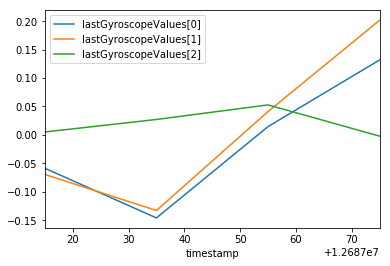

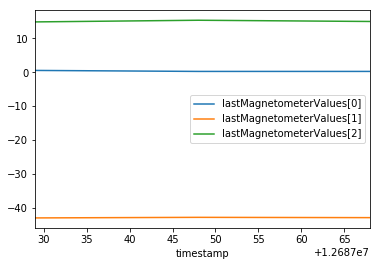

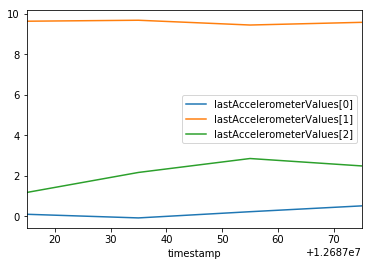

In [752]:
plt.show()

In [678]:
for idx, sample in toy.iterrows():
    for timestamp in data_Accelerometer.timestamp:
        if timestamp<sample.eventTime and timestamp>sample.downTime:
            print sample.eventTime, sample.downTime
            print data_Accelerometer.loc[data_Accelerometer['timestamp']==timestamp]
    break        

12687076.0 12687009.0
    timestamp  lastAccelerometerValues[0]  lastAccelerometerValues[1]  \
55   12687015                    0.107452                    9.624191   

    lastAccelerometerValues[2]  lastGyroscopeValues[0]  \
55                    1.183334               -0.004318   

    lastGyroscopeValues[1]  lastGyroscopeValues[2]  lastMagnetometerValues[0]  \
55                -0.01268               -0.005829                   0.323486   

    lastMagnetometerValues[1]  lastMagnetometerValues[2]  lastBtnId  
55                 -42.834473                  14.839172         -1  
12687076.0 12687009.0
    timestamp  lastAccelerometerValues[0]  lastAccelerometerValues[1]  \
56   12687035                   -0.072021                    9.672043   

    lastAccelerometerValues[2]  lastGyroscopeValues[0]  \
56                    2.169174                -0.05867   

    lastGyroscopeValues[1]  lastGyroscopeValues[2]  lastMagnetometerValues[0]  \
56               -0.069489                0.

In [832]:
pd.DataFrame

pandas.core.frame.DataFrame

In [7]:
data_Gyroscope.timestamp[0]

191275512087387

,lastAccelerometerValues[0]_mean,lastAccelerometerValues[1]_mean,lastAccelerometerValues[2]_mean,lastAccelerometerValues[0]_var,lastAccelerometerValues[1]_var,lastAccelerometerValues[2]_var,lastAccelerometerValues[0]_skew,lastAccelerometerValues[1]_skew,lastAccelerometerValues[2]_skew,lastAccelerometerValues[0]_kurtosis,lastAccelerometerValues[1]_kurtosis,lastAccelerometerValues[2]_kurtosis
0,1.206151,9.636943,1.008662,0.136589,0.028786,0.527728,-0.699506,0.607106,0.60066,-1.5,-1.5,-1.5


In [954]:
[s +'_'+mean.__name__ for s in list(a.keys())]

['lastAccelerometerValues[0]_mean',
 'lastAccelerometerValues[1]_mean',
 'lastAccelerometerValues[2]_mean']

In [911]:
[list(mean(a).keys())]

[['lastAccelerometerValues[0]',
  'lastAccelerometerValues[1]',
  'lastAccelerometerValues[2]']]

In [916]:
getsensorStats(a,mean)

[1.2061513166666666, 9.6369428333333342, 1.0086619000000001] ['lastAccelerometerValues[0]_mean', 'lastAccelerometerValues[1]_mean', 'lastAccelerometerValues[2]_mean']


,lastAccelerometerValues[0]_mean,lastAccelerometerValues[1]_mean,lastAccelerometerValues[2]_mean
0,1.206151,9.636943,1.008662


In [81]:
tapInfo=pd.read_json("../Data/TapInfo/ml16-141402-201711091951-export.json")

In [91]:
for idx, tap in tapInfo.btnID.iteritems():
    btnID=idx
    print tap
    break

{u'12687536': {u'2': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=30.971323, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687535, downTime=12687476, deviceId=6, source=0x1002 }']}, u'12687010': [[u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=43.959297, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687009, downTime=12687009, deviceId=6, source=0x1002 }']], u'12688255': {u'5': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688254, downTime=12688187, deviceId=6, source=0x1002 }']}, u'12687954': {u'4': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=24.976873, y[0]=48.9744

In [88]:
tapInfo.head()

,btnID
0,{u'12687536': {u'2': [u'MotionEvent { action=A...
1,{u'12691290': {u'5': [u'MotionEvent { action=A...
2,{u'12694955': {u'5': [u'MotionEvent { action=A...
3,{u'12696782': [[u'MotionEvent { action=ACTION_...
4,{u'12701418': {u'5': [u'MotionEvent { action=A...


                                                 btnID
0    {u'12687536': {u'2': [u'MotionEvent { action=A...
1    {u'12691290': {u'5': [u'MotionEvent { action=A...
2    {u'12694955': {u'5': [u'MotionEvent { action=A...
3    {u'12696782': [[u'MotionEvent { action=ACTION_...
4    {u'12701418': {u'5': [u'MotionEvent { action=A...
5    {u'12704484': {u'6': [u'MotionEvent { action=A...
6    {u'12707435': {u'6': [u'MotionEvent { action=A...
7    {u'12710888': {u'8': [u'MotionEvent { action=A...
8    {u'12713325': {u'6': [u'MotionEvent { action=A...
9    {u'12716518': {u'4': [u'MotionEvent { action=A...
10   {u'12719141': {u'3': [u'MotionEvent { action=A...
11   {u'12722181': {u'4': [u'MotionEvent { action=A...
12   {u'12725526': {u'6': [u'MotionEvent { action=A...
13   {u'12728240': {u'6': [u'MotionEvent { action=A...
14   {u'12730205': {u'3': [u'MotionEvent { action=A...
15   {u'12732318': [[u'MotionEvent { action=ACTION_...
16   {u'12735777': {u'3': [u'MotionEvent { action=A...
17   {u'12

In [352]:
x=str("{u'12687536': {u'2': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=30.971323, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687535, downTime=12687476, deviceId=6, source=0x1002 }']}, u'12687010': [[u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=43.959297, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687009, downTime=12687009, deviceId=6, source=0x1002 }']], u'12688255': {u'5': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688254, downTime=12688187, deviceId=6, source=0x1002 }']}, u'12687954': {u'4': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=24.976873, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687953, downTime=12687953, deviceId=6, source=0x1002 }']}, u'12689176': {u'9': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=28.973173, y[0]=72.962, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12689174, downTime=12689174, deviceId=6, source=0x1002 }']}, u'12688012': {u'4': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=24.976873, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688011, downTime=12687953, deviceId=6, source=0x1002 }']}, u'12687076': [[u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=43.959297, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687076, downTime=12687009, deviceId=6, source=0x1002 }']], u'12688673': {u'7': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=66.96512, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688672, downTime=12688672, deviceId=6, source=0x1002 }']}, u'12689235': {u'9': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=28.973173, y[0]=72.962, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12689233, downTime=12689174, deviceId=6, source=0x1002 }']}, u'12688918': {u'8': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=15.985199, y[0]=65.965645, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688915, downTime=12688915, deviceId=6, source=0x1002 }']}, u'12688489': {u'6': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=17.983349, y[0]=51.97293, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688488, downTime=12688446, deviceId=6, source=0x1002 }']}, u'12687311': [[u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=53.950047, y[0]=38.9797, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687310, downTime=12687310, deviceId=6, source=0x1002 }']], u'12688188': {u'5': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=48.97449, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688187, downTime=12688187, deviceId=6, source=0x1002 }']}, u'12688448': {u'6': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=17.983349, y[0]=51.97293, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688446, downTime=12688446, deviceId=6, source=0x1002 }']}, u'12687327': [[u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=53.950047, y[0]=38.9797, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687326, downTime=12687310, deviceId=6, source=0x1002 }']], u'12688984': {u'8': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=15.985199, y[0]=65.965645, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688982, downTime=12688915, deviceId=6, source=0x1002 }']}, u'12687720': {u'3': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=28.973173, y[0]=61.967724, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687719, downTime=12687719, deviceId=6, source=0x1002 }']}, u'12687477': {u'2': [u'MotionEvent { action=ACTION_DOWN, actionButton=0, id[0]=0, x[0]=30.971323, y[0]=59.968765, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687476, downTime=12687476, deviceId=6, source=0x1002 }']}, u'12687787': {u'3': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=28.973173, y[0]=61.967724, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12687786, downTime=12687719, deviceId=6, source=0x1002 }']}, u'12688734': {u'7': [u'MotionEvent { action=ACTION_UP, actionButton=0, id[0]=0, x[0]=19.981499, y[0]=66.96512, toolType[0]=TOOL_TYPE_FINGER, buttonState=0, metaState=0, flags=0x0, edgeFlags=0x0, pointerCount=1, historySize=0, eventTime=12688731, downTime=12688672, deviceId=6, source=0x1002 }']}}").replace('\'','\'')

row=ast.literal_eval(str(ast.literal_eval(x)[str('12687010')][0][0].replace('MotionEvent ','').replace('=','\':\'').replace(', ','\', \'').replace('{ ','{\'').replace(' }','\'}')))

In [633]:
def parse(tapInfo):
    cols=['eventTime', 'pointerCount', 'source', 'buttonState', 'actionButton', 'id0', 'historySize', 'toolType0', 'flags', 'deviceId', 'downTime', 'action', 'y0', 'x0', 'metaState', 'edgeFlags']
    df=pd.DataFrame(columns=cols)
    for btnID, btn in tapInfo.btnID.iteritems():

        sample=ast.literal_eval(str(btn).replace('u\'','\''))
        for timestamp in sample.keys():
            event=ast.literal_eval(str(sample[timestamp]))
            if type(event) is dict:
                idx = event.keys()[0]
                row=str(event[idx]) 
            else:
                idx=0
                row=str(event[0])
            t=row.replace('MotionEvent ','').replace('[','').replace(']','').replace('=','\':\'').replace(', ','\', \'').replace('\'{ ','{\'').replace(' }\'','\'}')
            dt=ast.literal_eval(t)
            dx=pd.DataFrame.from_records([dt],index=[0])
            if '2' in dx.columns:
                dx=pd.DataFrame.from_records([dx['2'][0]],index=[0]) 
            dx['action']=dx['action'][0][7:]
            dx['id0']=idx
            dx['actionButton']=int(btnID)
            dx['buttonState']=long(timestamp)
            dx['downTime']=long(dx['downTime'])
            dx['eventTime']=long(dx['eventTime'])
            df=pd.concat([df,dx],axis=0)
    df=df.sort('eventTime').reset_index().drop(['index','metaState','deviceId','edgeFlags','flags','historySize','pointerCount','source','toolType0','id0','x0','y0'],axis=1)
    return df

In [634]:
df=parse(tapInfo)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [635]:
toy=df[df['action']=='UP']

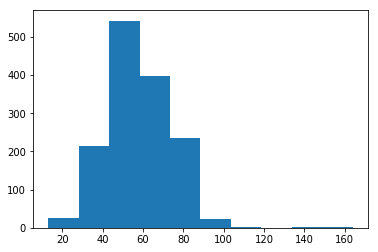

In [658]:
plt.hist(toy.eventTime-toy.downTime)
plt.show()

In [659]:
toy.eventTime-toy.downTime

1       67.0
3       16.0
5       59.0
7       67.0
9       58.0
11      67.0
13      42.0
15      59.0
17      67.0
19      59.0
21      80.0
23      84.0
25      75.0
27      93.0
29      84.0
32      68.0
34      83.0
36      66.0
38      93.0
40      92.0
42      44.0
44      49.0
46      40.0
48      65.0
50      67.0
52      73.0
54      75.0
56      67.0
58      74.0
60      67.0
        ... 
2859    65.0
2861    40.0
2863    25.0
2865    42.0
2867    49.0
2869    38.0
2871    41.0
2873    59.0
2875    25.0
2877    67.0
2879    55.0
2881    32.0
2883    50.0
2885    59.0
2887    49.0
2889    25.0
2891    41.0
2893    33.0
2895    41.0
2897    25.0
2899    47.0
2901    33.0
2903    25.0
2905    32.0
2907    41.0
2909    42.0
2911    34.0
2913    50.0
2915    42.0
2917    59.0
dtype: float64

In [612]:
toy

,action,actionButton,buttonState,downTime,eventTime,id0,x0,y0
0,UP,0.0,12687076.0,12687009.0,12687076.0,0.0,43.959297,59.968765
0,UP,0.0,12687327.0,12687310.0,12687326.0,0.0,53.950047,38.9797
0,UP,0.0,12687536.0,12687476.0,12687535.0,2.0,30.971323,59.968765
0,UP,0.0,12687787.0,12687719.0,12687786.0,3.0,28.973173,61.967724
0,UP,0.0,12688012.0,12687953.0,12688011.0,4.0,24.976873,48.97449
0,UP,0.0,12688255.0,12688187.0,12688254.0,5.0,19.981499,48.97449
0,UP,0.0,12688489.0,12688446.0,12688488.0,6.0,17.983349,51.97293
0,UP,0.0,12688734.0,12688672.0,12688731.0,7.0,19.981499,66.96512
0,UP,0.0,12688984.0,12688915.0,12688982.0,8.0,15.985199,65.965645
0,UP,0.0,12689235.0,12689174.0,12689233.0,9.0,28.973173,72.962


In [260]:
k=row.keys()

In [261]:
y.columns=k

In [295]:
y

,x[0],actionBtton,sorce,eventTime,pointerCont,historySize,flags,deviceId,downTime,action,y[0],bttonState,metaState,edgeFlags,id[0],toolType[0],eventTimestamp
0,43.959297,0,0x1002,12687009,1,0,0x0,6,12687009,ACTION_DOWN,59.968765,0,0,0x0,0,TOOL_TYPE_FINGER,12687536


0    12687536
Name: eventTimestamp, dtype: int64

In [287]:
pd.concat(pd.DataFrame('a',columns=['eventTimestamp']))

PandasError: DataFrame constructor not properly called!